#  TMDB Movie Data Analysis Pipeline

This notebook orchestrates the ETL pipeline for analyzing movie data from The Movie Database (TMDB).

## Pipeline Overview
1. **Extract**: Fetch movie data from TMDB API
2. **Transform**: Clean and preprocess the data
3. **Load**: Save data to CSV files
4. **Analyze**: Calculate KPIs and rankings
5. **Visualize**: Generate charts and insights

---
## Setup & Imports

In [3]:
# Standard library imports
import warnings
warnings.filterwarnings('ignore')

# Pipeline imports
from src.extract import extract
from src.transform import transform
from src.load import save_raw, save_processed, load_processed
from src.analysis import (
    get_best_worst_movies,
    search_movies,
    search_bruce_willis_scifi_action,
    search_thurman_tarantino,
    franchise_vs_standalone,
    top_franchises,
    top_directors,
    get_summary_statistics
)
from src.visualize import create_all_visualizations

print(" All modules imported successfully!")

 All modules imported successfully!


---
##  Step 1: Extract Data from TMDB API

Fetches movie details and credits for all target movie IDs.

In [4]:
# Extract raw data from TMDB API
df_raw = extract()

# Preview the raw data
print(f"\nExtracted {len(df_raw)} movies")
print(f"Columns: {list(df_raw.columns)}")
df_raw.head(3)

INFO     | Starting extraction for 19 movies...
INFO     | Processing movie 1/19 (ID: 0)
WARNING  | Movie ID 0 not found (404)
INFO     | Processing movie 2/19 (ID: 299534)
INFO     | ✓ Successfully extracted: Avengers: Endgame
INFO     | Processing movie 3/19 (ID: 19995)
INFO     | ✓ Successfully extracted: Avatar
INFO     | Processing movie 4/19 (ID: 140607)
INFO     | ✓ Successfully extracted: Star Wars: The Force Awakens
INFO     | Processing movie 5/19 (ID: 299536)
INFO     | ✓ Successfully extracted: Avengers: Infinity War
INFO     | Processing movie 6/19 (ID: 597)
INFO     | ✓ Successfully extracted: Titanic
INFO     | Processing movie 7/19 (ID: 135397)
INFO     | ✓ Successfully extracted: Jurassic World
INFO     | Processing movie 8/19 (ID: 420818)
INFO     | ✓ Successfully extracted: The Lion King
INFO     | Processing movie 9/19 (ID: 24428)
INFO     | ✓ Successfully extracted: The Avengers
INFO     | Processing movie 10/19 (ID: 168259)
INFO     | ✓ Successfully extracted: Fur


Extracted 18 movies
Columns: ['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'origin_country', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count', 'cast', 'cast_size', 'director', 'crew_size']


,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,...,status,tagline,title,video,vote_average,vote_count,cast,cast_size,director,crew_size
0,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,[US],en,...,Released,Avenge the fallen.,Avengers: Endgame,False,8.237,27112,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,107,Anthony Russo|Joe Russo,608
1,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.avatar.com/movies/avatar,19995,tt0499549,[US],en,...,Released,Enter the world of Pandora.,Avatar,False,7.600,33222,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,67,James Cameron,991
2,False,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,[US],en,...,Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.300,20187,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,183,J.J. Abrams,264


In [5]:
# Save raw data
save_raw(df_raw)

INFO     | Saving raw data to data/raw\movies_raw.csv...
INFO     | ✓ Saved 18 rows to data/raw\movies_raw.csv


'data/raw\\movies_raw.csv'

---
##  Step 2: Transform & Clean Data

Cleans the data by:
- Parsing JSON-like columns
- Converting data types
- Handling missing values
- Filtering to released movies only

In [6]:
# Transform and clean the data
df_clean = transform(df_raw)

# Preview the cleaned data
print(f"\nCleaned dataset: {df_clean.shape[0]} movies, {df_clean.shape[1]} columns")
df_clean.head()

INFO     | Starting transformation on 18 rows...
INFO     | Dropping columns: ['adult', 'imdb_id', 'original_title', 'video', 'homepage']
INFO     | Parsing JSON-like columns...
INFO     | JSON column parsing complete
INFO     | Converting data types...
INFO     | Data type conversion complete
INFO     | Handling missing values...
INFO     | Missing value handling complete
INFO     | Removing duplicates and invalid rows...
INFO     | Filtering rows with at least 10 non-NaN values...
INFO     | Filtering to released movies only...
INFO     | Reordering columns...
INFO     | Transformation complete! Final shape: (18, 24)
INFO     | Columns: ['id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection', 'original_language', 'budget_musd', 'revenue_musd', 'production_companies', 'production_countries', 'vote_count', 'vote_average', 'popularity', 'runtime', 'overview', 'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director', 'crew_size', 'backdrop_path', 'origin_co


Cleaned dataset: 18 movies, 24 columns


,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,runtime,overview,spoken_languages,poster_path,cast,cast_size,director,crew_size,backdrop_path,origin_country
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.439100,Marvel Studios,...,181,After the devastating events of Avengers: Infi...,English|日本語|Xhosa,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,107,Anthony Russo|Joe Russo,608,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,[US]
1,19995,Avatar,Enter the world of Pandora.,2009-12-16,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2923.706026,Dune Entertainment|Lightstorm Entertainment|20...,...,162,"In the 22nd century, a paraplegic Marine is di...",English|Español,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,67,James Cameron,991,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,[US]
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,Adventure|Action|Science Fiction,Star Wars Collection,en,245.0,2068.223624,Lucasfilm Ltd.|Bad Robot,...,136,Thirty years after defeating the Galactic Empi...,English,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,183,J.J. Abrams,264,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,[US]
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,Adventure|Action|Science Fiction,The Avengers Collection,en,300.0,2052.415039,Marvel Studios,...,149,As the Avengers and their allies have continue...,English|Xhosa,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Joe Russo|Anthony Russo,734,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,[US]
4,597,Titanic,Nothing on earth could come between them.,1997-12-18,Drama|Romance,None,en,200.0,2264.162353,Paramount Pictures|20th Century Fox|Lightstorm...,...,194,101-year-old Rose DeWitt Bukater tells the sto...,English|Français|Deutsch|svenska|Italiano|Pусский,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,262,/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,[US]


In [7]:
# Save processed data
save_processed(df_clean)

INFO     | Saving processed data to data/processed\movies_clean.csv...
INFO     | ✓ Saved 18 rows to data/processed\movies_clean.csv


'data/processed\\movies_clean.csv'

---
##  Step 3: Analysis & KPIs

Calculate key performance indicators and rankings.

### 3.1 Summary Statistics

In [8]:
# Get overall summary statistics
stats = get_summary_statistics(df_clean)

print(" Dataset Summary")
print("=" * 40)
for key, value in stats.items():
    print(f"{key.replace('_', ' ').title()}: {value}")

INFO     | Calculating summary statistics...
INFO     | Summary statistics calculated


 Dataset Summary
Total Movies: 18
Date Range: 1997-12-18 00:00:00 to 2019-11-20 00:00:00
Total Revenue Musd: 30452.972899
Total Budget Musd: 3848.0
Avg Revenue Musd: 1691.8318277222222
Avg Budget Musd: 213.77777777777777
Avg Rating: 7.392555555555556
Avg Popularity: 22.103749999999998
Unique Genres: 11
Franchise Movies: 16
Standalone Movies: 2


### 3.2 Best & Worst Performing Movies

In [9]:
# Get all rankings
rankings = get_best_worst_movies(df_clean, top_n=5)

# Display key rankings
print("\n Top 5 Movies by Revenue")
display(rankings['highest_revenue'][['title', 'revenue_musd', 'budget_musd', 'vote_average']])

INFO     | Calculating best/worst movie rankings...
INFO     | Generated 12 ranking categories



 Top 5 Movies by Revenue


,title,revenue_musd,budget_musd,vote_average
0,Avatar,2923.706026,237.0,7.600
1,Avengers: Endgame,2799.439100,356.0,8.237
2,Titanic,2264.162353,200.0,7.902
3,Star Wars: The Force Awakens,2068.223624,245.0,7.300
4,Avengers: Infinity War,2052.415039,300.0,8.236


In [10]:
print("\n Top 5 Movies by ROI (Budget >= $10M)")
display(rankings['highest_roi'][['title', 'roi_percent', 'budget_musd', 'revenue_musd']])


 Top 5 Movies by ROI (Budget >= $10M)


,title,roi_percent,budget_musd,revenue_musd
0,Avatar,1133.631235,237.0,2923.706026
1,Titanic,1032.081177,200.0,2264.162353
2,Jurassic World,1014.358296,150.0,1671.537444
3,Harry Potter and the Deathly Hallows: Part 2,973.208975,125.0,1341.511219
4,Frozen II,869.122317,150.0,1453.683476


In [11]:
print("\n Top 5 Highest Rated Movies (>= 10 votes)")
display(rankings['highest_rated'][['title', 'vote_average', 'vote_count', 'popularity']])


 Top 5 Highest Rated Movies (>= 10 votes)


,title,vote_average,vote_count,popularity
0,Avengers: Endgame,8.237,27112,18.7803
1,Avengers: Infinity War,8.236,31326,29.1609
2,Harry Potter and the Deathly Hallows: Part 2,8.083,21565,18.8739
3,Titanic,7.902,26647,35.7108
4,The Avengers,7.901,34997,67.1662


In [12]:
print("\n Top 5 Most Popular Movies")
display(rankings['most_popular'][['title', 'popularity', 'vote_average', 'revenue_musd']])


 Top 5 Most Popular Movies


,title,popularity,vote_average,revenue_musd
0,Avatar,78.4923,7.600,2923.706026
1,The Avengers,67.1662,7.901,1518.815515
2,Titanic,35.7108,7.902,2264.162353
3,Avengers: Infinity War,29.1609,8.236,2052.415039
4,Beauty and the Beast,18.9568,6.969,1266.115964


### 3.3 Advanced Search Queries

In [13]:
# Search 1: Best-rated Sci-Fi Action movies with Bruce Willis
print("\n Search 1: Sci-Fi Action Movies with Bruce Willis (sorted by rating)")
bruce_willis_movies = search_bruce_willis_scifi_action(df_clean)

if len(bruce_willis_movies) > 0:
    display(bruce_willis_movies[['title', 'genres', 'vote_average', 'runtime']])
else:
    print("No matching movies found in the dataset.")

INFO     | Executing Search 1: Bruce Willis Sci-Fi Action movies...
INFO     | Executing advanced movie search...
INFO     | Search returned 0 results



 Search 1: Sci-Fi Action Movies with Bruce Willis (sorted by rating)
No matching movies found in the dataset.


In [14]:
# Search 2: Uma Thurman movies directed by Quentin Tarantino
print("\n Search 2: Uma Thurman + Quentin Tarantino Movies (sorted by runtime)")
thurman_tarantino_movies = search_thurman_tarantino(df_clean)

if len(thurman_tarantino_movies) > 0:
    display(thurman_tarantino_movies[['title', 'director', 'runtime', 'vote_average']])
else:
    print("No matching movies found in the dataset.")

INFO     | Executing Search 2: Uma Thurman + Quentin Tarantino movies...
INFO     | Executing advanced movie search...
INFO     | Search returned 0 results



 Search 2: Uma Thurman + Quentin Tarantino Movies (sorted by runtime)
No matching movies found in the dataset.


### 3.4 Franchise vs Standalone Analysis

In [15]:
# Compare franchise vs standalone movies
print("\n Franchise vs Standalone Movies")
comparison = franchise_vs_standalone(df_clean)
display(comparison)

INFO     | Comparing franchise vs standalone movies...
INFO     | Franchise vs Standalone comparison complete



 Franchise vs Standalone Movies


,revenue_musd,roi_percent,budget_musd,popularity,vote_average,movie_count
Type,,,,,,
Standalone,1765.14,861.70,180.0,27.33,7.44,2
Franchise,1682.67,678.61,218.0,21.45,7.39,16


### 3.5 Top Franchises

In [16]:
# Find most successful franchises
print("\n Most Successful Movie Franchises")
franchises = top_franchises(df_clean, top_n=10)
display(franchises)

INFO     | Analyzing top 10 franchises...
INFO     | Found 10 franchises



 Most Successful Movie Franchises


,franchise,movie_count,total_budget_musd,mean_budget_musd,total_revenue_musd,mean_revenue_musd,mean_rating
0,The Avengers Collection,4,1111.0,277.75,7776.07,1944.02,7.91
1,Star Wars Collection,2,545.0,272.50,3400.92,1700.46,7.03
2,Jurassic Park Collection,2,320.0,160.00,2982.01,1491.00,6.60
3,Avatar Collection,1,237.0,237.00,2923.71,2923.71,7.60
4,Frozen Collection,2,300.0,150.00,2727.90,1363.95,7.24
5,The Lion King (Reboot) Collection,1,260.0,260.00,1662.02,1662.02,7.10
6,The Fast and the Furious Collection,1,190.0,190.00,1515.40,1515.40,7.20
7,Black Panther Collection,1,200.0,200.00,1349.93,1349.93,7.36
8,Harry Potter Collection,1,125.0,125.00,1341.51,1341.51,8.08
9,The Incredibles Collection,1,200.0,200.00,1243.23,1243.23,7.45


### 3.6 Top Directors

In [17]:
# Find most successful directors
print("\n Most Successful Directors")
directors = top_directors(df_clean, top_n=10)
display(directors)

INFO     | Analyzing top 10 directors...
INFO     | Found 10 directors



 Most Successful Directors


,director,movie_count,total_revenue_musd,mean_rating
0,James Cameron,2,5187.87,7.75
1,Anthony Russo,2,4851.85,8.24
2,Joe Russo,2,4851.85,8.24
3,Joss Whedon,2,2924.22,7.59
4,Jennifer Lee,2,2727.90,7.24
5,Chris Buck,2,2727.90,7.24
6,J.J. Abrams,1,2068.22,7.30
7,Colin Trevorrow,1,1671.54,6.70
8,Jon Favreau,1,1662.02,7.10
9,James Wan,1,1515.40,7.20


---
##  Step 4: Visualizations

Generate all charts and save to the visualizations folder.

In [18]:
# Create all visualizations
viz_paths = create_all_visualizations(df_clean)

print(f"\n Created {len(viz_paths)} visualizations:")
for path in viz_paths:
    print(f"  - {path}")

INFO     | Creating all visualizations...
INFO     | Creating Revenue vs Budget plot...
INFO     | ✓ Saved: visualizations\revenue_vs_budget.png
INFO     | Creating ROI by Genre plot...
INFO     | ✓ Saved: visualizations\roi_by_genre.png
INFO     | Creating Popularity vs Rating plot...
INFO     | ✓ Saved: visualizations\popularity_vs_rating.png
INFO     | Creating Yearly Trends plot...
INFO     | ✓ Saved: visualizations\yearly_trends.png
INFO     | Creating Franchise vs Standalone comparison plot...
INFO     | Comparing franchise vs standalone movies...
INFO     | Franchise vs Standalone comparison complete
INFO     | ✓ Saved: visualizations\franchise_comparison.png
INFO     | Created 5 visualizations



 Created 5 visualizations:
  - visualizations\revenue_vs_budget.png
  - visualizations\roi_by_genre.png
  - visualizations\popularity_vs_rating.png
  - visualizations\yearly_trends.png
  - visualizations\franchise_comparison.png


### Display Visualizations


📊 Franchise Comparison


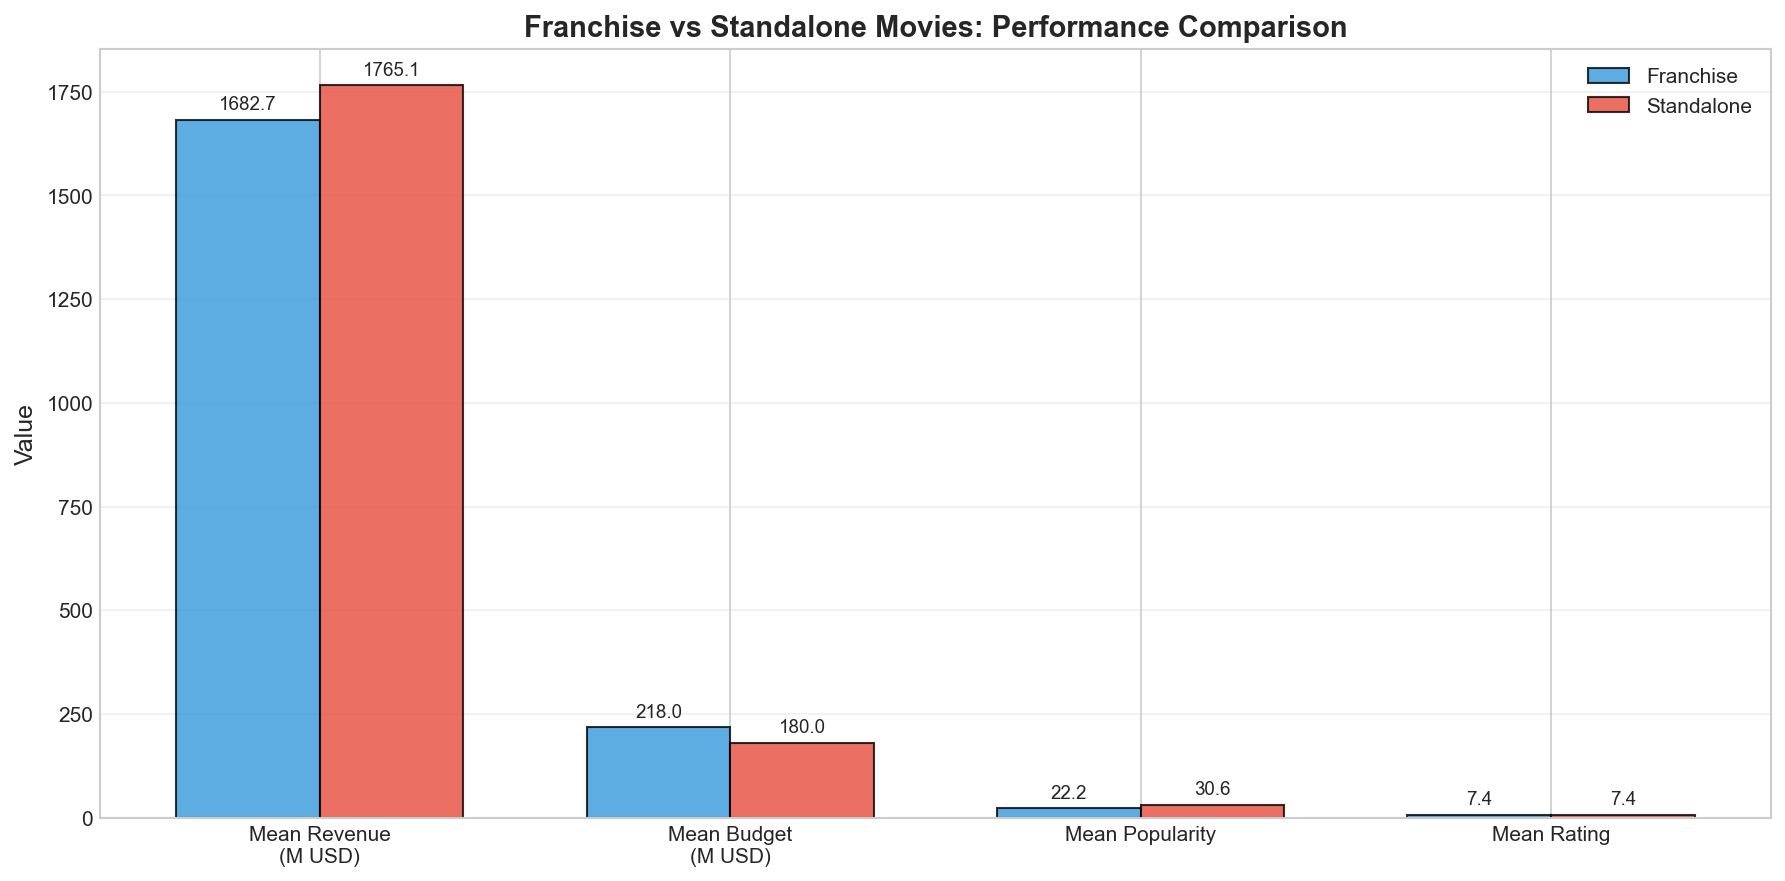


📊 Popularity Vs Rating


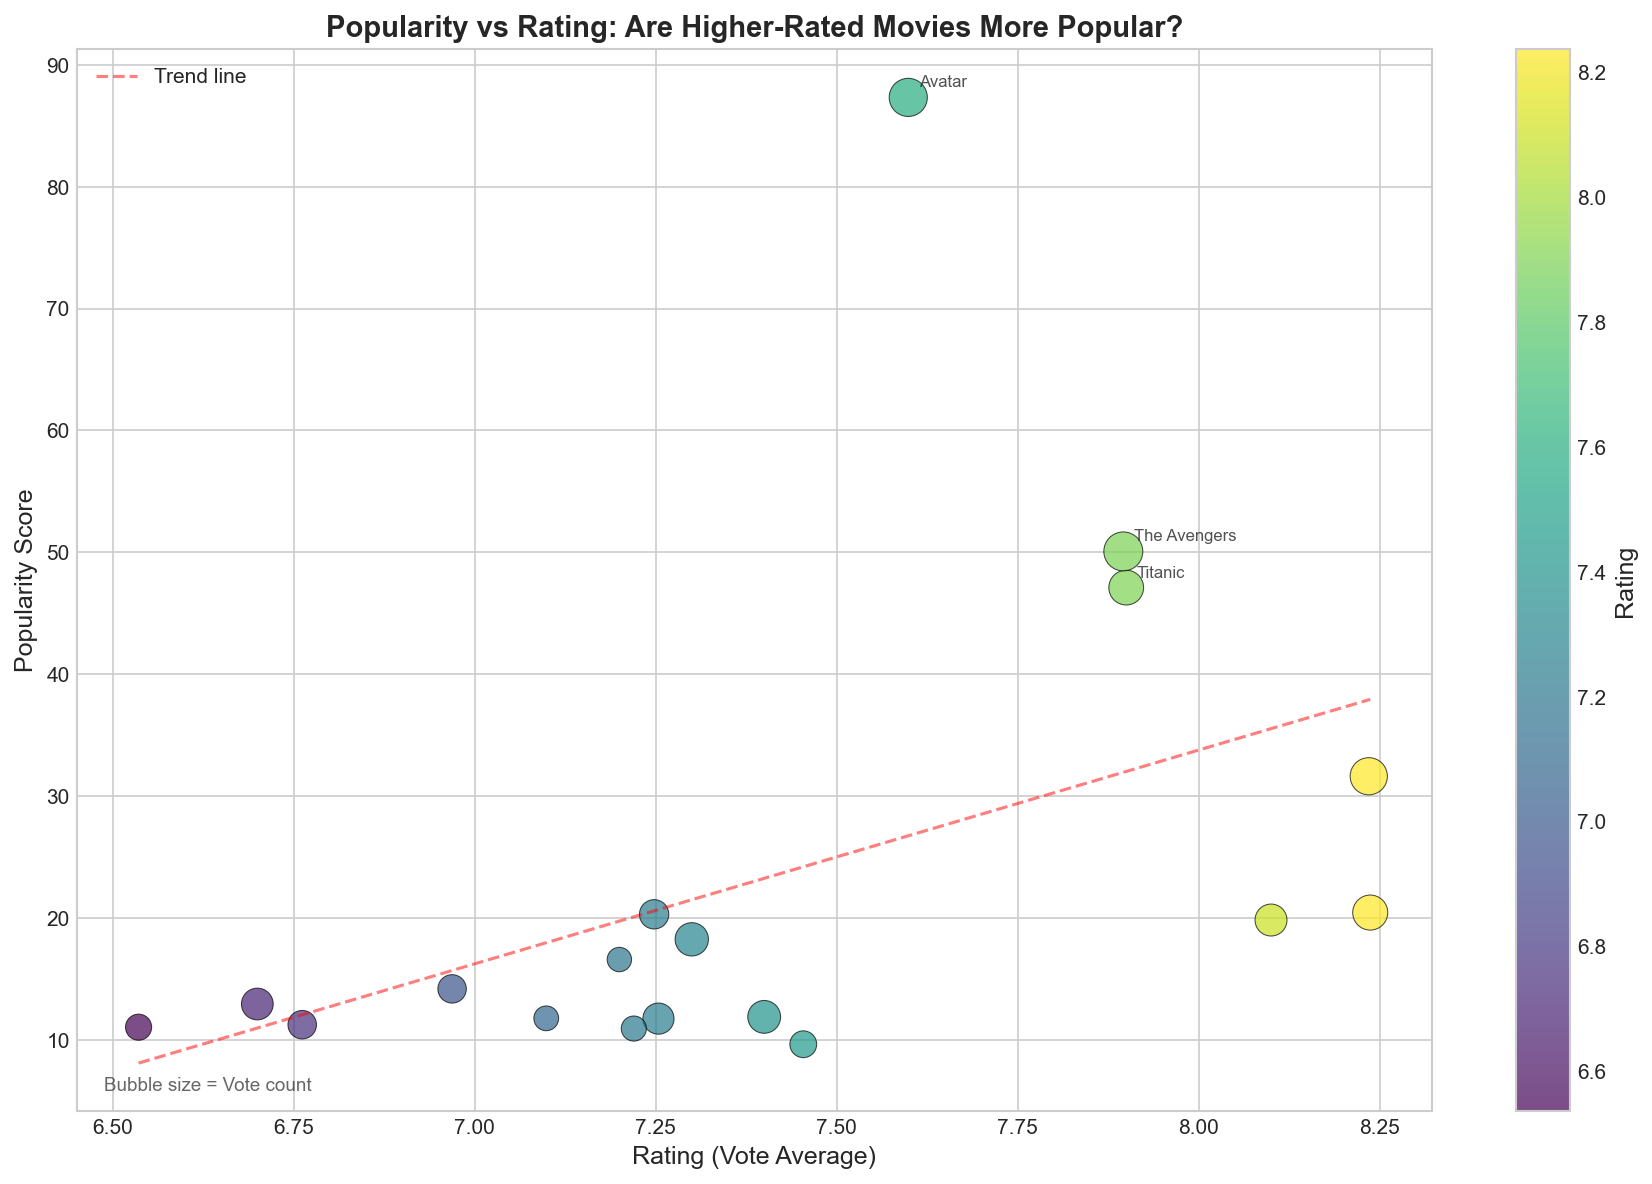


📊 Revenue Vs Budget


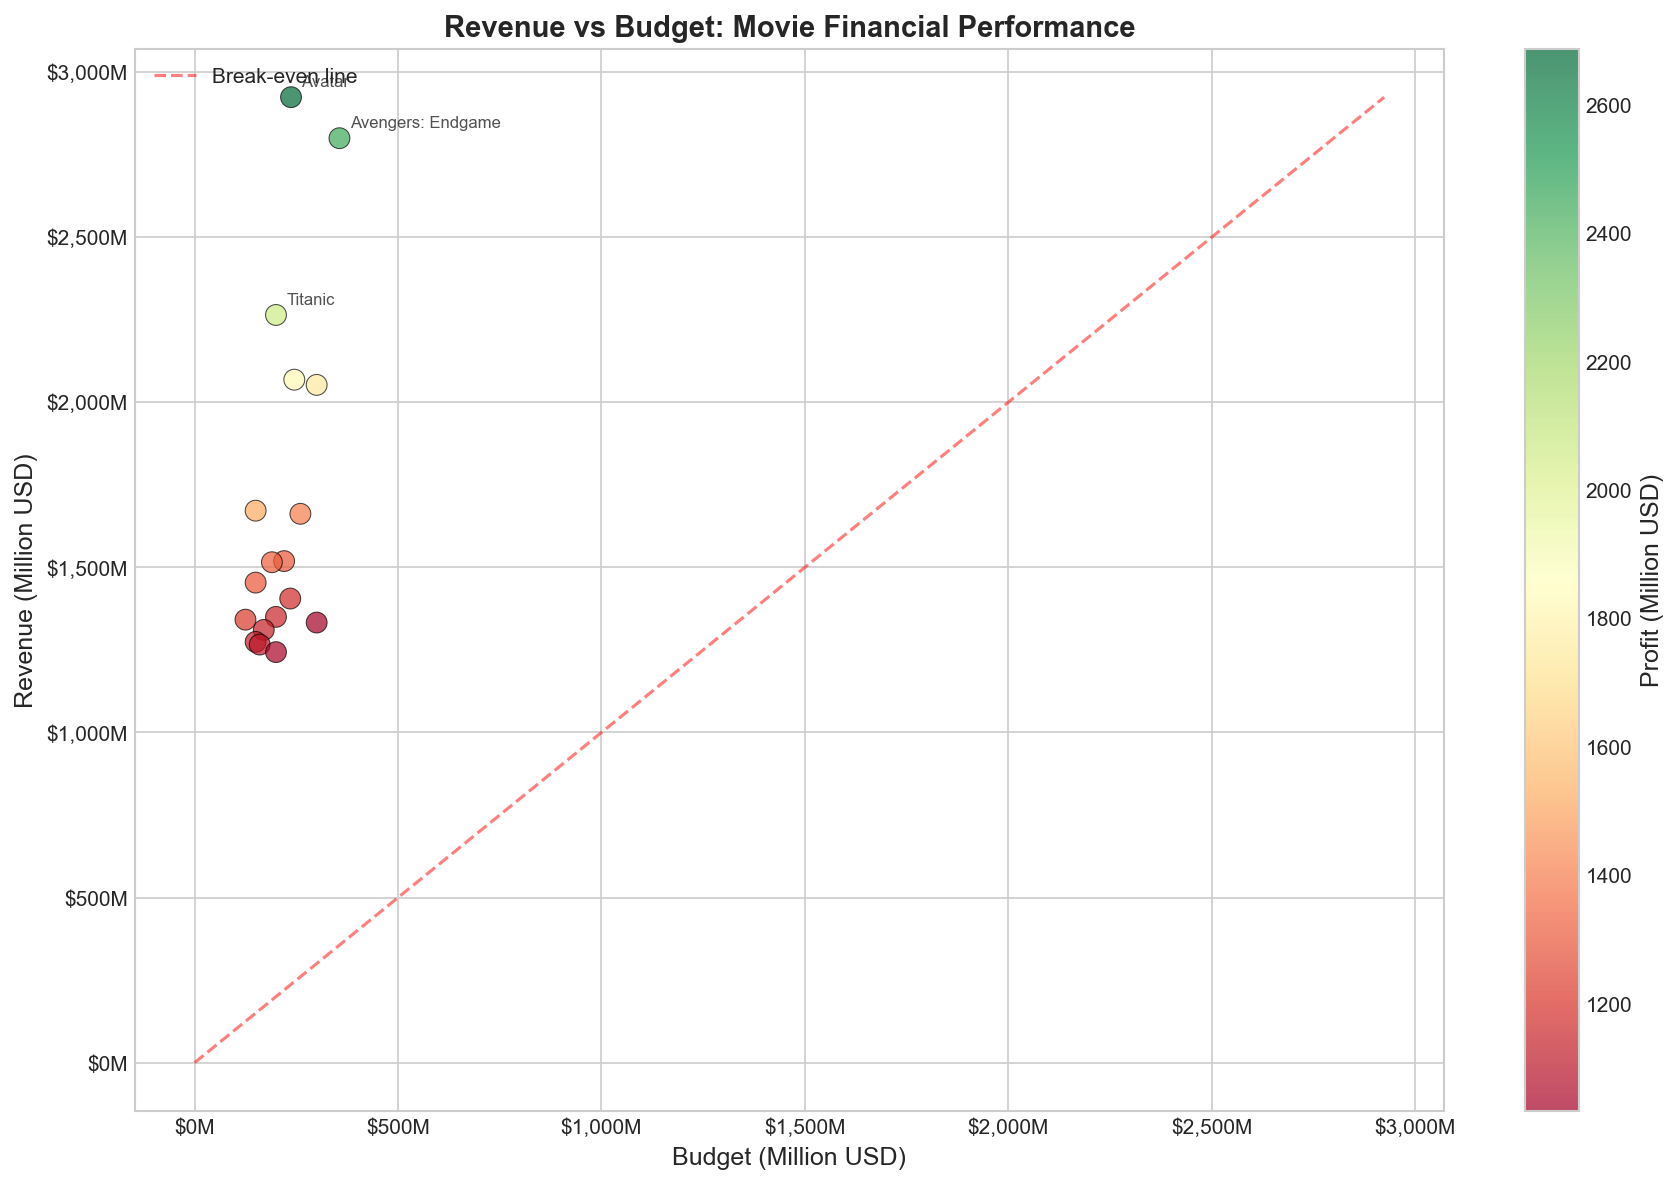


📊 Roi By Genre


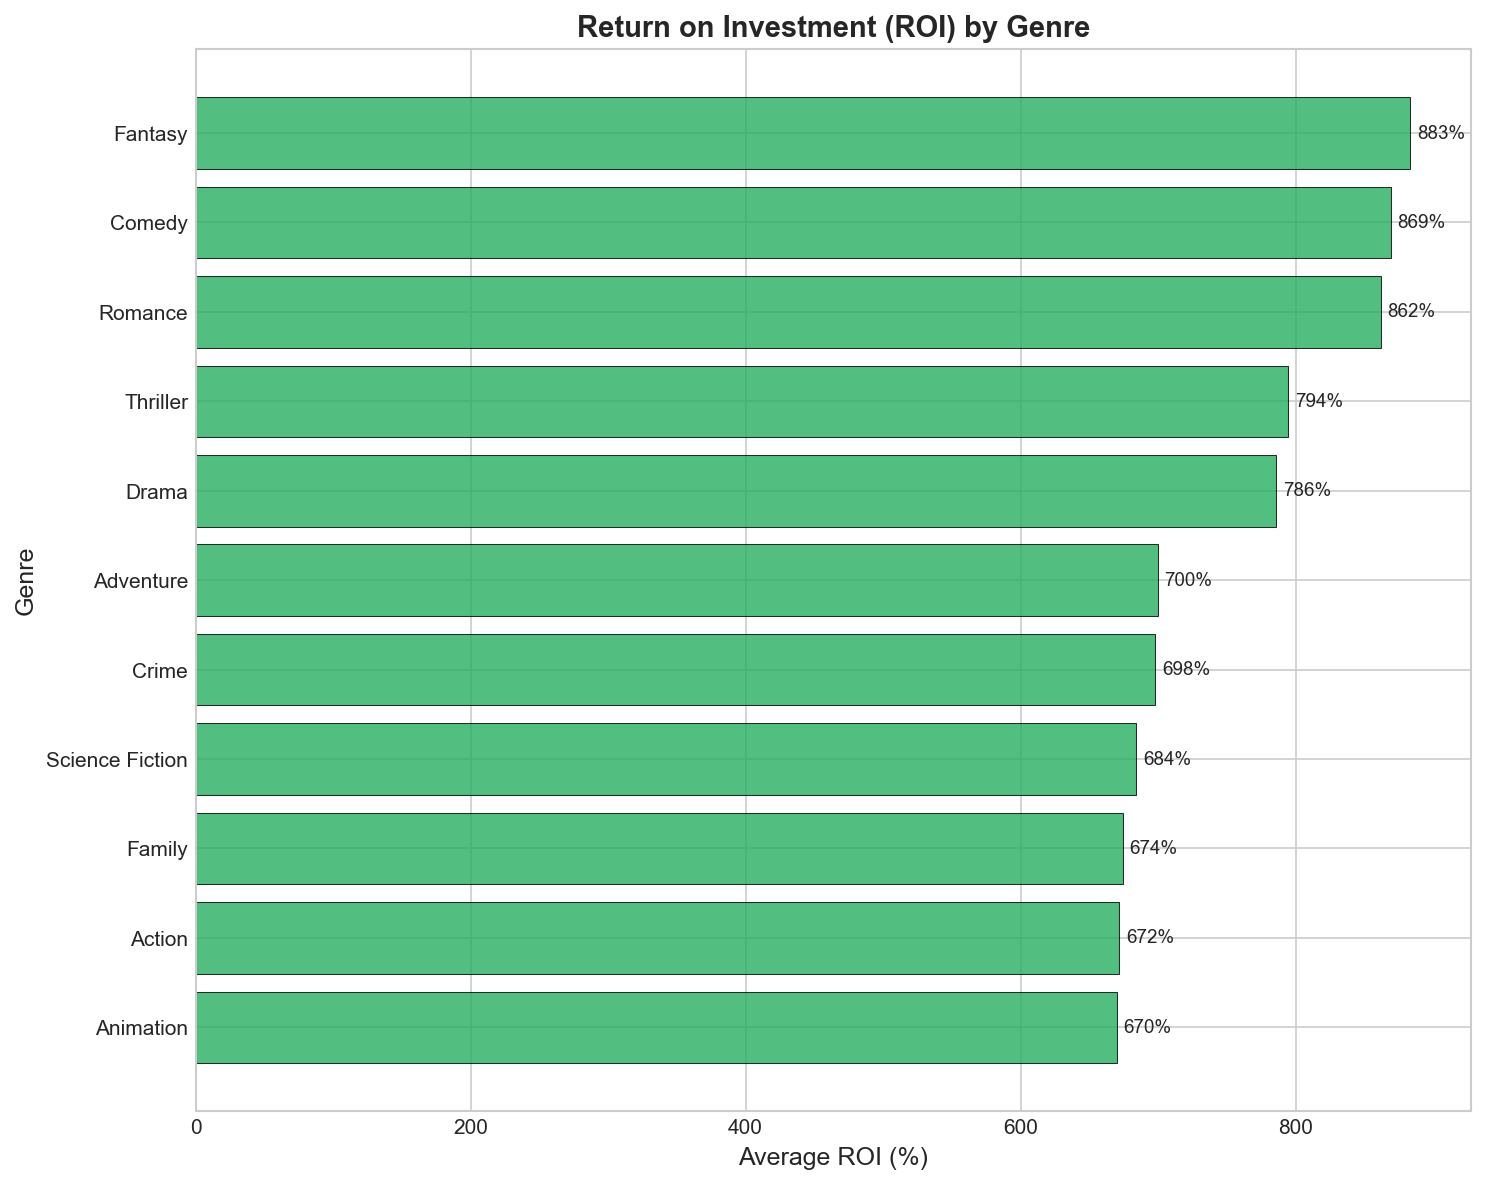


📊 Yearly Trends


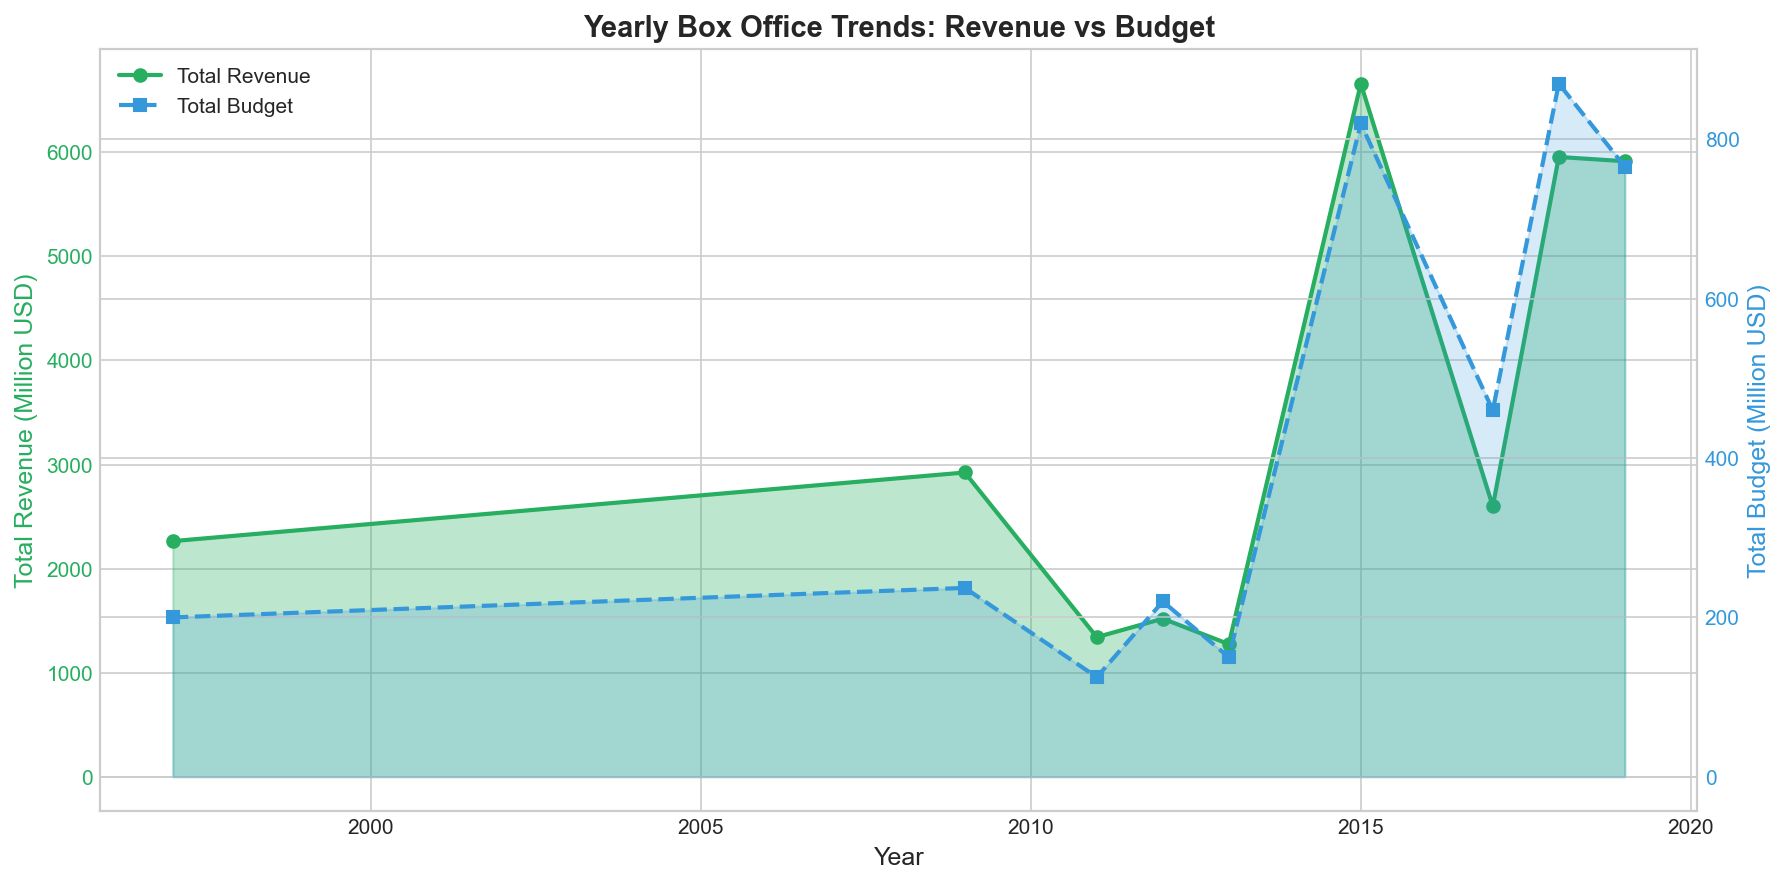

In [ ]:
# Display saved visualizations
from IPython.display import Image, display
import os

viz_dir = 'visualizations'
for img_file in os.listdir(viz_dir):
    if img_file.endswith('.png'):
        print(f"\n {img_file.replace('_', ' ').replace('.png', '').title()}")
        display(Image(filename=os.path.join(viz_dir, img_file), width=800))

---
##  Pipeline Complete!

### Summary of Outputs:
- **Raw Data**: `data/raw/movies_raw.csv`
- **Cleaned Data**: `data/processed/movies_clean.csv`
- **Visualizations**: `visualizations/*.png`
- **Logs**: `logs/pipeline.log`